In [62]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

In [63]:
data=pd.read_csv("C:\\Users\\Mega Store\\Documents\\jupyter\\task 4\\twitter_training.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [64]:
data.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [65]:
# calculate the duplicated items
data.duplicated().sum()

2701

In [66]:
# drop the duplicated items from dataset
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [67]:
missing_values = data.isnull().sum()
missing_values

ID             0
Topic          0
Sentiment      0
Text         326
dtype: int64

In [68]:
data.dropna(inplace=True)
data.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

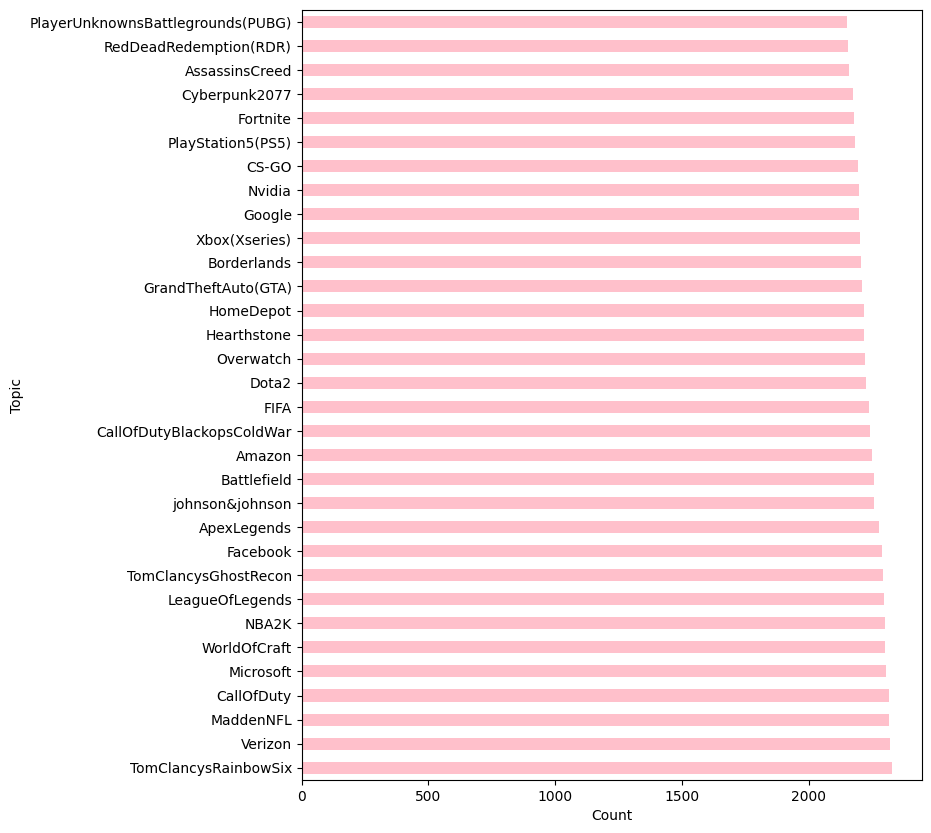

In [69]:
plt.figure(figsize=(8,10))
data["Topic"].value_counts().plot(kind="barh",color="pink")
plt.xlabel("Count")
plt.show()

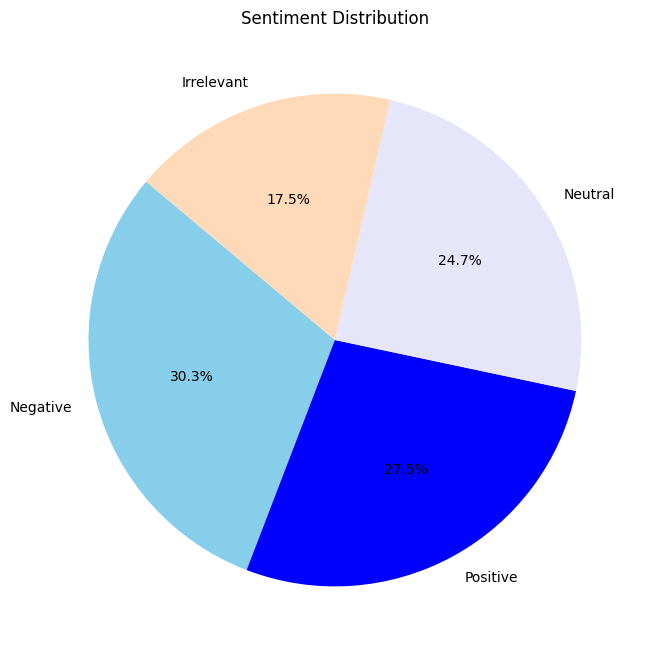

In [70]:
sentiment_count=data["Sentiment"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8,8))
plt.pie(sentiment_count,labels=sentiment_count.index,autopct="%1.1f%%",startangle=140, colors=['skyblue', 'Blue', 'Lavender', 'peachpuff'])
plt.title('Sentiment Distribution')
plt.show()

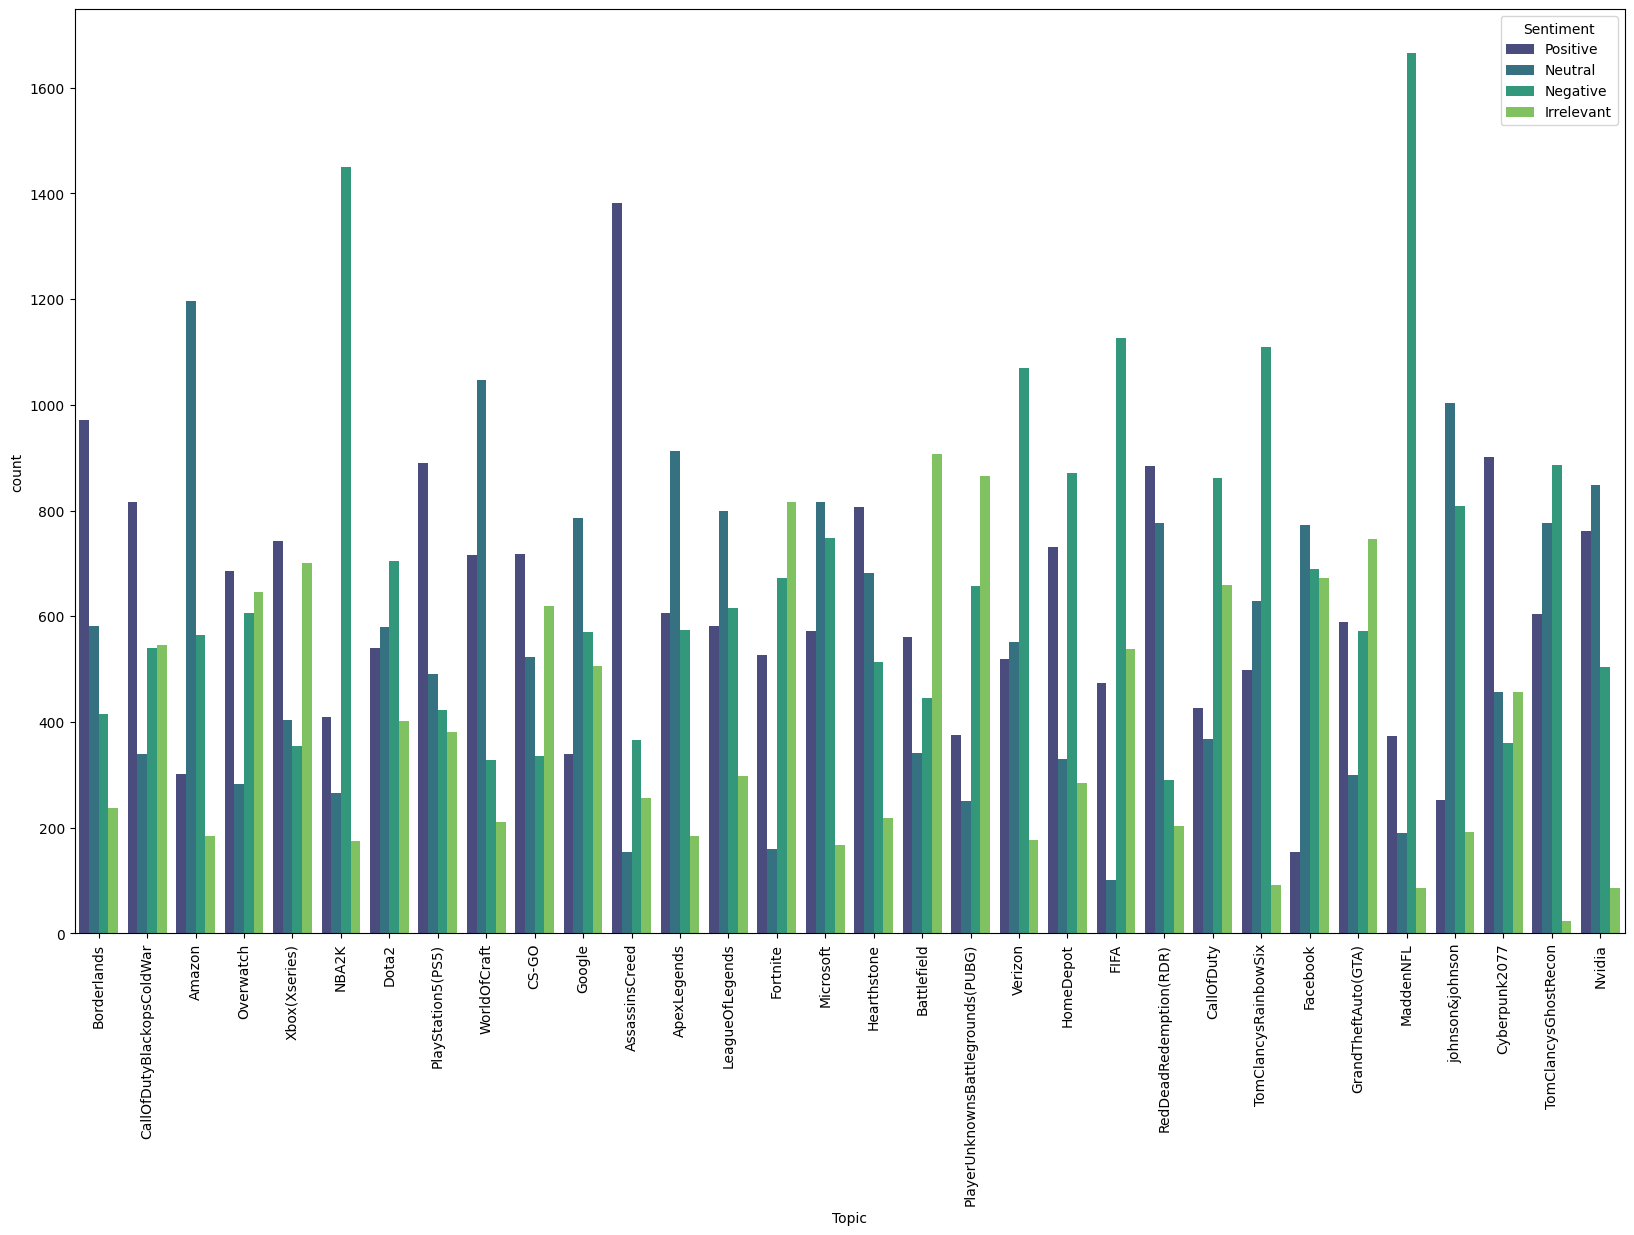

In [71]:
#show sentiment visulization
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=data,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

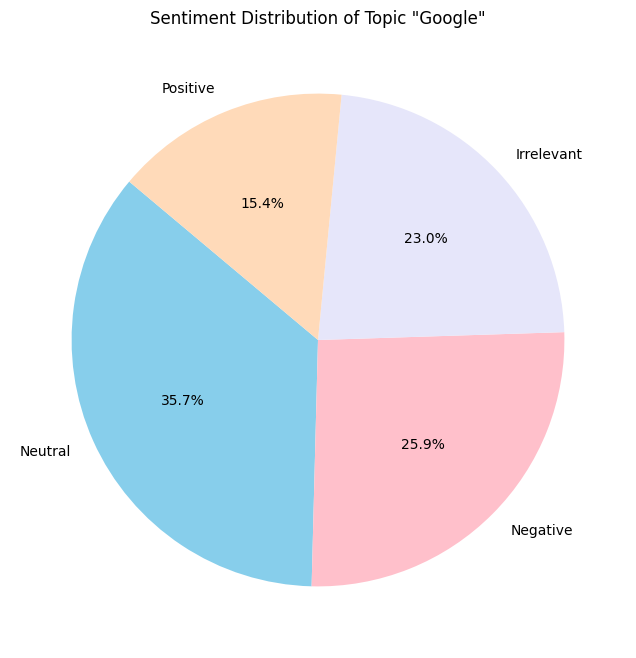

In [72]:
# Filter the dataset to include only entries related to the topic 'Google'
google= data[data['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140,colors=['skyblue', 'pink', 'Lavender', 'peachpuff'])
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

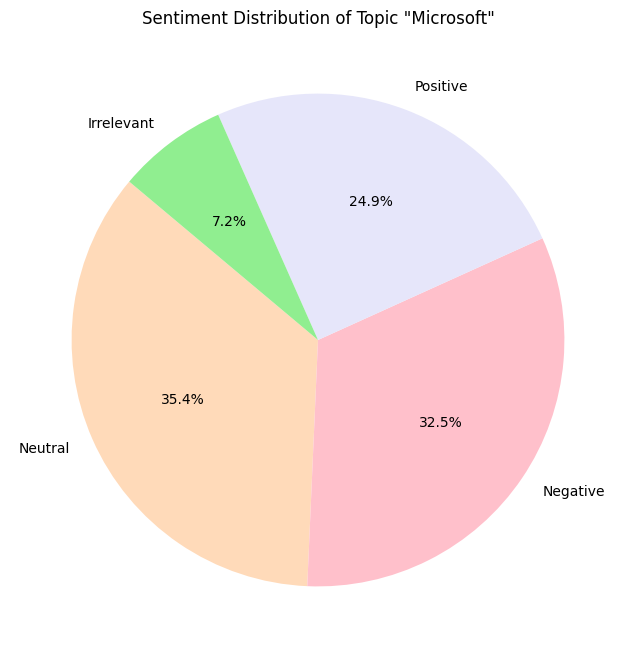

In [73]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
Microsoft = data[data['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = Microsoft['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140,colors=['peachpuff', 'pink', 'Lavender', 'lightgreen'])
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

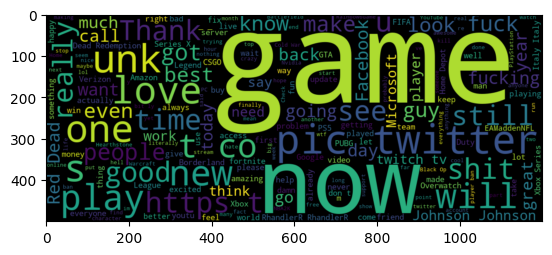

In [74]:
# This code generates a Word Cloud from the 'Text' column of the 'data' DataFrame and displays it using matplotlib.

corpus = ' '.join(data['Text'])
wc2 = WordCloud(width=1200, height=500).generate(corpus)
plt.imshow(wc2, interpolation='bilinear')